# Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

Decision tree is popular and effective machine learning used prominantly for classification task. They learn to make decisions by recursively partitioning the data based on the features. They provide a transparent and interpretable framework for understanding complex decision-making processes, enabling us to navigate the branches of uncertainty and extract valuable insights from the leaves of knowledge.

The tree itself is a model in decision trees and we would like to estimate an optimal tree structure from the given training data.

The internal nodes contains conditions on the features. Depending on the outcome of the comparision, we take an appropriate path in the tree. The process is repeated until we reach the leaf node.

In case of classification, leaf nodes contains label and in case of regression, the prediction is obtained by taking sample mean of labels of the subset of the training examples present in that leaf node.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
dataset=load_iris()
import seaborn as sns
df=sns.load_dataset('iris')

In [6]:
# Independent and dependent features
X=df.iloc[:,:-1]
y=dataset.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [9]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
# Post pruning with max_depth=2
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

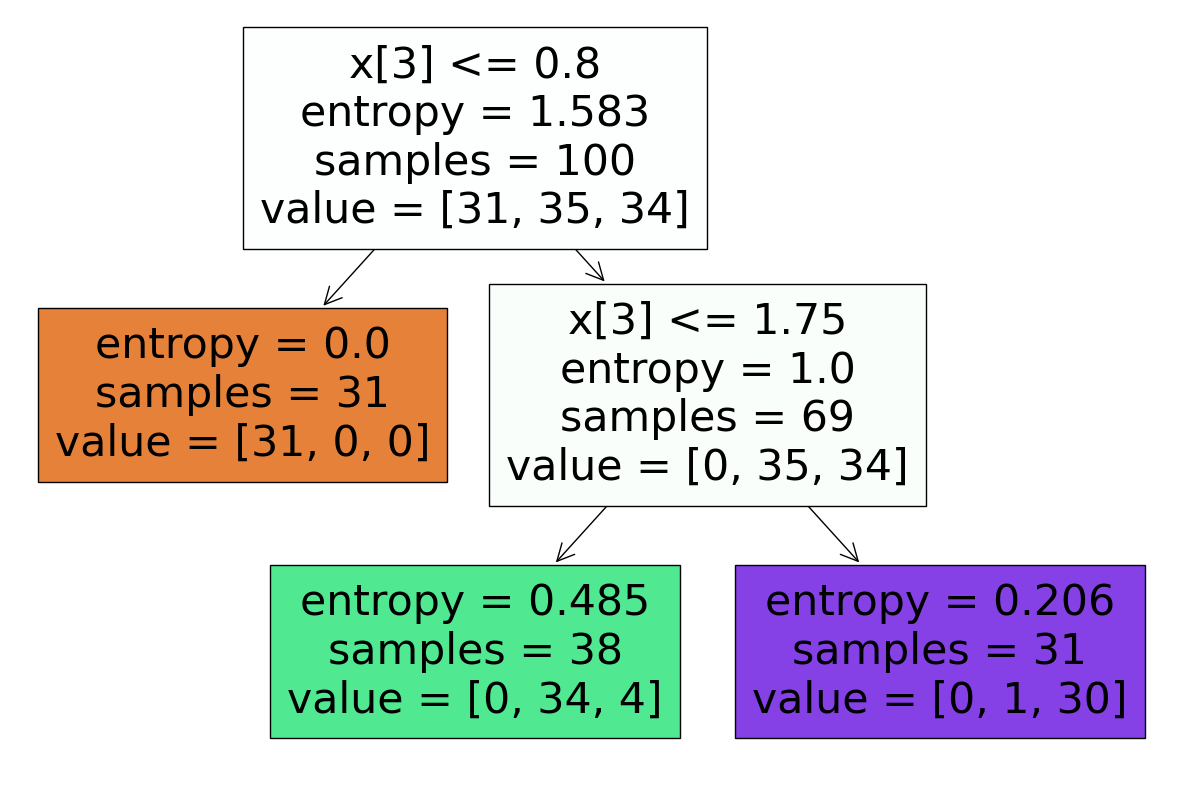

In [11]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

# Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.

Step 1: Entropy and Information Gain

1.1. Entropy (H): Entropy is a measure of impurity or disorder in a set of data points. In the context of decision trees, it quantifies the uncertainty about class labels in a dataset. 

H(D) = -p(0) * log2(p(0)) - p(1) * log2(p(1))

where p(0) is the proportion of samples belonging to class 0 in D, and p(1) is the proportion belonging to class 1.

Gini index/Gini impurity

It measures impurity in the node. It has a value between 0 and 0.5. So the Gini index of value 0 means sample are perfectly homogeneous and all elements are similar, whereas, Gini index of value 1 means maximal inequality among elements. It is sum of the square of the probabilities of each class. It is illustrated as,

gini index= 1-Σpi^2


1.2. Information Gain (IG): Information Gain measures the reduction in entropy achieved by partitioning a dataset based on a particular feature. It quantifies how much more certain we become about class labels after the partition.

IG(D, F) = H(D) - Σ [ (|Di| / |D|) * H(Di) ]

where |Di| is the number of data points in the ith partition, |D| is the total number of data points in D, and H(Di) is the entropy of the ith partition.

Step 2: Building the Decision Tree

2.1. Selecting the Best Split: The decision tree algorithm iterates over all features and their possible thresholds to find the feature and threshold that maximizes Information Gain. This feature and threshold pair represent the best split for the current node of the tree.

2.2. Splitting the Dataset: The dataset is partitioned into subsets based on the selected feature and threshold. For each subset, a child node is created in the tree.

2.3. Recursion: The above steps are recursively applied to each child node until one of the stopping criteria is met. Stopping criteria can include reaching a maximum depth, having a minimum number of samples in a leaf node, or reaching a predefined level of purity (e.g., entropy is below a threshold).

3.Pruning (Optional)

Pruning is an optional step aimed at simplifying the decision tree to prevent overfitting. Pruning removes branches that do not significantly improve the tree's predictive power.

# Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

A decision tree classifier is a supervised machine learning algorithm used for solving binary classification problems, where the goal is to categorize data points into one of two classes (usually denoted as "0" and "1"). A decision tree classifier can be used to solve a binary classification problem by recursively splitting the dataset based on input features and assigning one of two binary classes to each subset. It uses a tree-like structure where each internal node represents a feature and a threshold for splitting, while each leaf node represents a class label.

Accuracy: 1.00


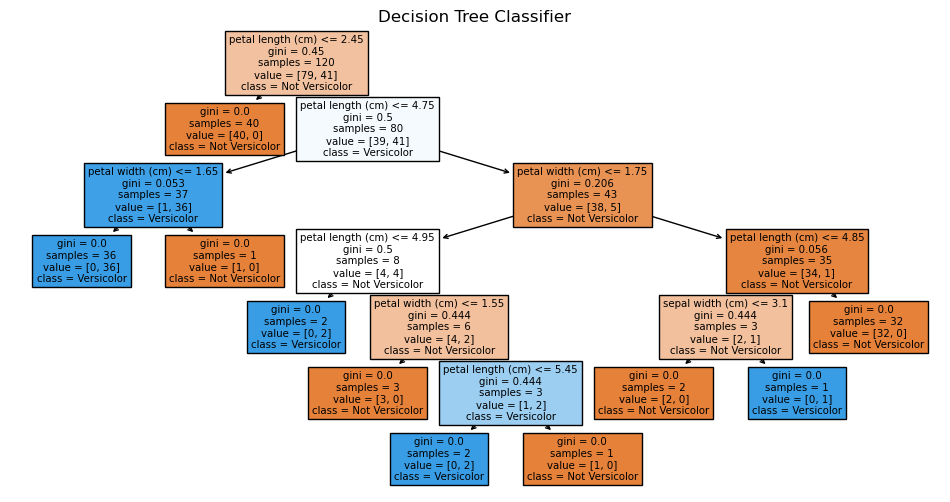

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = (data.target == 1).astype(int)  # Binary classification: Setosa (0) vs. Versicolor (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=["Not Versicolor", "Versicolor"])
plt.title("Decision Tree Classifier")
plt.show()

# Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions.

a decision tree is a hierarchical structure that recursively splits the input data into subsets based on the features of the data. Each split is determined by selecting a feature and a threshold value for that feature, which optimally separates the data into different classes or groups.

Root Nodes – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

Decision Nodes – the nodes we get after splitting the root nodes are called Decision Node

Leaf Nodes – the nodes where further splitting is not possible are called leaf nodes or terminal nodes

Sub-tree – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

Pruning – is nothing but cutting down some nodes to stop overfitting.

 Classification trees
Classification trees determine whether an event happened or didn’t happen. Usually, this involves a “yes” or “no” outcome. 
We often use this type of decision-making in the real world.

Regression trees, on the other hand, predict continuous values based on previous data or information sources. For example, they can predict the price of gasoline or whether a customer will purchase eggs (including which type of eggs and at which store).
This type of decision-making is more about programming algorithms to predict what is likely to happen, given previous behavior or trends. 

Here's how decision trees make predictions using this geometric intuition:

Traversal: To make a prediction for a new data point, you start at the root node and traverse the tree by following the decision criteria at each internal node. At each step, you compare the feature value of the data point with the threshold value associated with that node.

Branching: Depending on whether the feature value is less than or greater than the threshold, you move down the left or right branch, respectively, until you reach a leaf node.

Prediction: The class assigned to the leaf node reached during traversal is the predicted class for the input data point.

# Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

True Positive (TP): It is the total counts having both predicted and actual values are Dog.
True Negative (TN): It is the total counts having both predicted and actual values are Not Dog.
False Positive (FP): It is the total counts having prediction is Dog while actually Not Dog.
False Negative (FN): It is the total counts having prediction is Not Dog while actually, it is Dog.

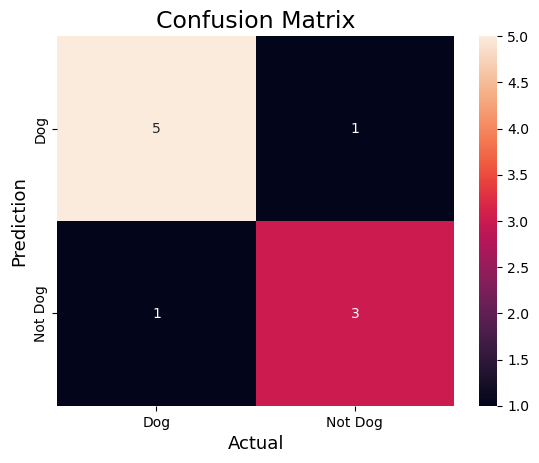

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])
 
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 

Accuracy = {TP+TN}/{TP+TN+FP+FN}
Accuracy = (5+3)/(5+3+1+1) = 8/10 = 0.8

Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model

Precision = {TP}/{TP+FP}
Precision = 5/(5+1) =5/6 = 0.8333

Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

Recall= {TP}/{TP+FN}
Recall = 5/(5+1) =5/6 = 0.8333

F1-Score: F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,

F1-Score = {2.Precision.Recall}/{Precision + Recall}

For the above case:
F1-Score: = (2* 0.8333* 0.8333)/( 0.8333+ 0.8333)  = 0.8333

# Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.

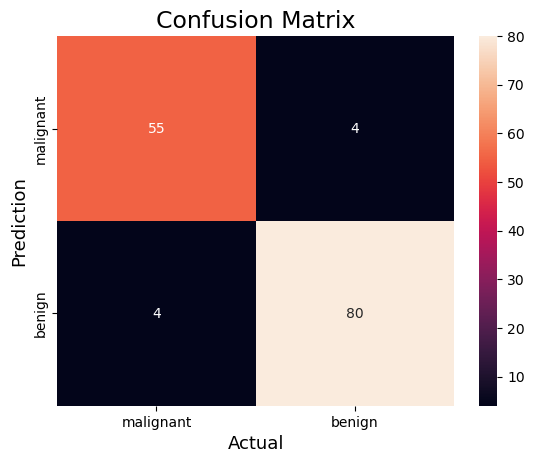

Accuracy : 0.9440559440559441
Precision : 0.9523809523809523
Recall : 0.9523809523809523
F1-score : 0.9523809523809523


In [2]:
#Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer dataset
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

# Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# preduction
y_pred = tree.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['malignant', 'benign'],
			yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score :", F1_score)


# Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done.

Evaluation metrics are used to measure the quality of the model. One of the most important topics in machine learning is how to evaluate your model. When you build your model, it is very crucial to measure how accurately it predicts your expected outcome.

We have different evaluation metrics for a different set of machine learning algorithms. For evaluating classification models, we use classification metrics and for evaluating regression models, we use regression metrics.

Evaluation metrics can help you assess your model’s performance, monitor your ML system in production, and control your model to fit your business needs.

The simplest metric for model evaluation is Accuracy. It is the ratio of the number of correct predictions to the total number of predictions made for a dataset.Accuracy is useful when the target class is well balanced but is not a good choice with unbalanced classes.

For example, A dataset with two target classes containing 100 samples. 98 samples belong to class A and 2 samples belong to class B in our training data, our model would give us 98% accuracy. That’s why we need to look at more metrics to get a better result.
Accuracy = {TP+TN}/{TP+TN+FP+FN}


# Q8. Provide an example of a classification problem where precision is the most important metric, and explain why.

Precision: This tells when you predict something positive, how many times they were actually positive. whereas,

Recall: This tells out of actual positive data, how many times you predicted correctly.


True Positives (TP): 8	                   False Positives (FP): 2

False Negatives (FN): 3	                   True Negatives (TN): 17

Precision measures the percentage of emails flagged as spam that were correctly classified
precision=TP/TP+FP=8/8+2=0.8

Recall measures the percentage of actual spam emails that were correctly classified
Recall=TP/TP+FN=8/8+3=0.73

In [3]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Generate a hypothetical dataset (you should replace this with your actual data)
emails = ["Buy cheap watches!", "Important meeting tomorrow", "Get rich quick!", "Confirmation of your order"]
labels = [1, 0, 1, 0]  # 1 for spam, 0 for legitimate

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier (you can use other classifiers as well)
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate precision, recall, accuracy, and other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# You can now fine-tune your model or adjust the threshold to optimize precision.


Precision: 0.00
Recall: 0.00
Accuracy: 0.00

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarni

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
# Load the breast cancer dataset
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
 
# Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)
 
# preduction
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)

Accuracy   : 0.8951048951048951
Precision : 0.9285714285714286
Recall    : 0.896551724137931


# Q9. Provide an example of a classification problem where recall is the most important metric, and explain why.

Decreasing classification threshold.

False positives increase, and false negatives decrease. As a result, this time, precision decreases and recall increases:
True Positives (TP): 9	       False Positives (FP): 3
    
False Negatives (FN): 2	        True Negatives (TN): 16

precision=TP/TP+FP=9/9+3=0.75
Recall=TP/TP+FN=9/9+2=0.82


In [10]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Generate a hypothetical dataset (you should replace this with real data)
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (e.g., logistic regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate recall, precision, accuracy, and other metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# You can now fine-tune your model or adjust the threshold to optimize recall.


Recall: 0.99
Precision: 0.96
Accuracy: 0.96


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Given these considerations, in medical diagnostics like breast cancer detection, the emphasis is often placed on maximizing recall even if it means accepting a higher rate of false positives. This prioritizes the identification of as many true positive cases (cancer patients) as possible, reducing the risk of overlooking a potentially life-threatening condition.